# Citi Bike Data
- https://www.citibikenyc.com/system-data 

This Jupyter notebook does the following (as of Monday, Feb. 17):
1. Imports .json data of Station Info (consider to be static)
2. Imports .json data of Station Status (may change frequently)
3. Imports .csv of Citi Bike trips


- We'll use the Station Info/Status data to build a VeRoViz "nodes" dataframe.
- We'll use the trips data to build a VeRoViz "assignments" dataframe.

With the nodes and assignments dataframes, we can then generate Leaflet maps (static) and Cesium movies.

---

In [1]:
# We'll need these libraries
import numpy as np
import pandas as pd
import time
import matplotlib.pyplot as plt

In [2]:
# These libraries will help us import JSON data:
import json
import urllib.request

In [3]:
# Go ahead and import VeRoViz
import veroviz as vrv
vrv.checkVersion()

'Your current installed version of veroviz is 0.3.1. You are up-to-date with the latest available version.'

In [4]:
# I like to use "environment" variables to store "private" stuff
# (like API keys, or paths to installed files).
# We'll need the `os` library for that:
import os

# See https://veroviz.org/documentation.html#installation for details

--- 

## 1. Import Station Info (from .json)
- These data are *mostly* static...certainly won't change throughout the course of a day.

In [5]:
# Here's one way to import JSON data.
# I'm leaving this here, because it will work with "GET" and "POST" requests,
# which we might use later this semester.
# Tim's approach (below) is a bit cleaner.
'''
import json
import urllib3

urllib3.disable_warnings()

http = urllib3.PoolManager()

response = http.request('GET', "https://gbfs.citibikenyc.com/gbfs/en/station_information.json")
station_info_data = json.loads(response.data.decode('utf-8'))
station_info_data
''';

# The trailing `;` keeps Jupyter from regurgitating our block comment

In [6]:
# Tim's approach for grabbing JSON data:
with urllib.request.urlopen("https://gbfs.citibikenyc.com/gbfs/en/station_information.json") as url:
    station_info_data = json.loads(url.read().decode())
#station_info_data

In [7]:
# station_info_data is a dictionary (which contains several sub-dictionaries).
# Get a list of keys within the station_info_data['data'] dictionary:
station_info_data['data'].keys()

dict_keys(['stations'])

In [8]:
# How many stations are there?
len(station_info_data['data']['stations'])

935

In [9]:
# Convert the JSON data into a Pandas dataframe:
station_info_df = pd.DataFrame(station_info_data['data']['stations'])
station_info_df.head()

,station_id,external_id,name,short_name,lat,lon,region_id,rental_methods,capacity,rental_url,electric_bike_surcharge_waiver,eightd_has_key_dispenser,eightd_station_services,has_kiosk
0,3255,66ddbd20-0aca-11e7-82f6-3863bb44ef7c,8 Ave & W 31 St,6450.05,40.750585,-73.994685,71,"[KEY, CREDITCARD]",19,http://app.citibikenyc.com/S6Lr/IBV092JufD?sta...,False,False,[{'id': '9fb74cf0-b08b-4983-ae0e-be909fc28bc3'...,True
1,72,66db237e-0aca-11e7-82f6-3863bb44ef7c,W 52 St & 11 Ave,6926.01,40.767272,-73.993929,71,"[KEY, CREDITCARD]",55,http://app.citibikenyc.com/S6Lr/IBV092JufD?sta...,False,False,NaN,True
2,79,66db269c-0aca-11e7-82f6-3863bb44ef7c,Franklin St & W Broadway,5430.08,40.719116,-74.006667,71,"[KEY, CREDITCARD]",33,http://app.citibikenyc.com/S6Lr/IBV092JufD?sta...,False,False,NaN,True
3,82,66db277a-0aca-11e7-82f6-3863bb44ef7c,St James Pl & Pearl St,5167.06,40.711174,-74.000165,71,"[KEY, CREDITCARD]",27,http://app.citibikenyc.com/S6Lr/IBV092JufD?sta...,False,False,NaN,True
4,83,66db281e-0aca-11e7-82f6-3863bb44ef7c,Atlantic Ave & Fort Greene Pl,4354.07,40.683826,-73.976323,71,"[KEY, CREDITCARD]",62,http://app.citibikenyc.com/S6Lr/IBV092JufD?sta...,False,False,NaN,True


In [10]:
station_info_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 935 entries, 0 to 934
Data columns (total 14 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   station_id                      935 non-null    object 
 1   external_id                     935 non-null    object 
 2   name                            935 non-null    object 
 3   short_name                      935 non-null    object 
 4   lat                             935 non-null    float64
 5   lon                             935 non-null    float64
 6   region_id                       935 non-null    int64  
 7   rental_methods                  935 non-null    object 
 8   capacity                        935 non-null    int64  
 9   rental_url                      935 non-null    object 
 10  electric_bike_surcharge_waiver  935 non-null    bool   
 11  eightd_has_key_dispenser        935 non-null    bool   
 12  eightd_station_services         1 no

---

## 2.  Get Station Status Data (from .json)
- These data may change frequently.  I don't know how often they're updated.

In [11]:
# Using Murray's old approach:
'''
response = http.request('GET', "https://gbfs.citibikenyc.com/gbfs/en/station_status.json")
station_status_data = json.loads(response.data.decode('utf-8'))
station_status_data
''';

In [12]:
# Tim's approach for grabbing JSON data:
with urllib.request.urlopen("https://gbfs.citibikenyc.com/gbfs/en/station_status.json") as url:
    station_status_data = json.loads(url.read().decode())
#station_status_data

In [13]:
# Convert the data into a Pandas dataframe:
station_status_df = pd.DataFrame(station_status_data['data']['stations'])
station_status_df.head()

,station_id,num_bikes_available,num_ebikes_available,num_bikes_disabled,num_docks_available,num_docks_disabled,is_installed,is_renting,is_returning,last_reported,eightd_has_available_keys,eightd_active_station_services
0,3255,13,0,2,4,0,1,1,1,1582630356,False,[{'id': '9fb74cf0-b08b-4983-ae0e-be909fc28bc3'}]
1,72,48,3,3,4,0,1,1,1,1582630193,False,NaN
2,79,25,0,1,7,0,1,1,1,1582615744,False,NaN
3,82,26,0,0,1,0,1,1,1,1582630150,False,NaN
4,83,48,1,2,12,0,1,1,1,1582627359,False,NaN


In [14]:
station_status_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 935 entries, 0 to 934
Data columns (total 12 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   station_id                      935 non-null    object
 1   num_bikes_available             935 non-null    int64 
 2   num_ebikes_available            935 non-null    int64 
 3   num_bikes_disabled              935 non-null    int64 
 4   num_docks_available             935 non-null    int64 
 5   num_docks_disabled              935 non-null    int64 
 6   is_installed                    935 non-null    int64 
 7   is_renting                      935 non-null    int64 
 8   is_returning                    935 non-null    int64 
 9   last_reported                   935 non-null    int64 
 10  eightd_has_available_keys       935 non-null    bool  
 11  eightd_active_station_services  1 non-null      object
dtypes: bool(1), int64(9), object(2)
memory usage: 81.4

--- 

## 3.  Import Trip Data (from .csv)
- We'll create a pandas dataframe from the data.
- See https://s3.amazonaws.com/tripdata/index.html for available datasets.

In [15]:
# I just randomly grabbed this file:
bike_trips_df = pd.read_csv('/home/tim/development/data/citibike/202001-citibike-tripdata.csv')

In [16]:
# bike_trips_df.columns

# Using `list()` formats things a little better:
list(bike_trips_df.columns)

['tripduration',
 'starttime',
 'stoptime',
 'start station id',
 'start station name',
 'start station latitude',
 'start station longitude',
 'end station id',
 'end station name',
 'end station latitude',
 'end station longitude',
 'bikeid',
 'usertype',
 'birth year',
 'gender']

--- 

## Create a VeRoViz "nodes" Dataframe
- We'll populate this with data from Station Info and Station Status
- We'll also hard-code some columns

In [17]:
nodes = vrv.initDataframe('nodes')

In [18]:
# Here are the columns we'll need to populate:
list(nodes.columns)

['id',
 'lat',
 'lon',
 'altMeters',
 'nodeName',
 'nodeType',
 'leafletIconPrefix',
 'leafletIconType',
 'leafletColor',
 'leafletIconText',
 'cesiumIconType',
 'cesiumColor',
 'cesiumIconText']

In [19]:
# Here are the columns from our "Station Info":
list(station_info_df.columns)

['station_id',
 'external_id',
 'name',
 'short_name',
 'lat',
 'lon',
 'region_id',
 'rental_methods',
 'capacity',
 'rental_url',
 'electric_bike_surcharge_waiver',
 'eightd_has_key_dispenser',
 'eightd_station_services',
 'has_kiosk']

In [20]:
# An example to show the syntax for displaying 2 particular columns from a df:
station_info_df[['lat', 'lon']].head()

,lat,lon
0,40.750585,-73.994685
1,40.767272,-73.993929
2,40.719116,-74.006667
3,40.711174,-74.000165
4,40.683826,-73.976323


In [21]:
# Let's go ahead and re-initialize an empty dataframe within this cell:
nodes = vrv.initDataframe('nodes')

# Now, copy the relevant columns from our Station Info dataframe:
# NOTE: We were getting some size mis-match errors until we copied 
#       just a single column first.  
nodes['id'] = station_info_df['station_id'].values
nodes[['id', 'lat', 'lon', 'nodeName']] = station_info_df[['station_id', 'lat', 'lon', 'name']].values
nodes[['leafletIconText', 'cesiumIconText']] = station_info_df[['name', 'station_id']].values

# Finally, we'll fill in the rest of our nodes dataframe with some hard-coded/constant values:
nodes.loc[:,'altMeters'] = 0
nodes.loc[:,['nodeType', 'leafletIconPrefix', 'leafletIconType', 'leafletColor']] = [
             'CitiBikeStation',  'fa',                'bicycle',         'orange']
nodes.loc[:,['cesiumIconType', 'cesiumColor']] = ['pin', 'Cesium.Color.ORANGE']

In [22]:
nodes.head()

,id,lat,lon,altMeters,nodeName,nodeType,leafletIconPrefix,leafletIconType,leafletColor,leafletIconText,cesiumIconType,cesiumColor,cesiumIconText
0,3255,40.7506,-73.9947,0,8 Ave & W 31 St,CitiBikeStation,fa,bicycle,orange,8 Ave & W 31 St,pin,Cesium.Color.ORANGE,3255
1,72,40.7673,-73.9939,0,W 52 St & 11 Ave,CitiBikeStation,fa,bicycle,orange,W 52 St & 11 Ave,pin,Cesium.Color.ORANGE,72
2,79,40.7191,-74.0067,0,Franklin St & W Broadway,CitiBikeStation,fa,bicycle,orange,Franklin St & W Broadway,pin,Cesium.Color.ORANGE,79
3,82,40.7112,-74.0002,0,St James Pl & Pearl St,CitiBikeStation,fa,bicycle,orange,St James Pl & Pearl St,pin,Cesium.Color.ORANGE,82
4,83,40.6838,-73.9763,0,Atlantic Ave & Fort Greene Pl,CitiBikeStation,fa,bicycle,orange,Atlantic Ave & Fort Greene Pl,pin,Cesium.Color.ORANGE,83


In [23]:
# Show all of the nodes on a Leaflet map:
vrv.createLeaflet(nodes=nodes)

In [24]:
# FIXME

# It would be better (in my opinion) to color-code the nodes 
# based on Station STATUS.  For example:
# - green  --> bikes and docks are available
# - red    --> no bikes available
# - yellow --> no docks available


### Homework FIXME part 1

In [25]:
def assess_station_status(station_status_df, nodes_df):
    '''takes an input data frame and analyzes station status, and modifies the colors of the nodes.
       Node coloring is as follows:
       green --> bikes and docks are available
       red --> no bike available
       yellow --> no docks available
    '''    
    # combine the two tables:
    combined_table = pd.concat([nodes_df, station_status_df], axis=1)
    
    # now let's look and change the veroviz leaflet color - not substitute orange for yellow
    combined_table['leafletColor'] = combined_table.apply(lambda x:'green' if x.num_bikes_available > 0 and x.num_docks_available > 0  else ('orange' if x.num_bikes_available > 0 and x.num_docks_available == 0 else ('red' if x.num_bikes_available == 0 else 'orange')), axis=1)

    # update the color in cesium
    combined_table['cesiumColor'] = combined_table.apply(lambda x:'Cesium.Color.GREEN' if x.num_bikes_available > 0 and x.num_docks_available > 0  else ('Cesium.Color.YELLOW' if x.num_bikes_available > 0 and x.num_docks_available == 0 else ('Cesium.Color.RED' if x.num_bikes_available == 0 else 'Cesium.Color.RED')), axis=1)

    
    return combined_table
  

In [26]:
nodes = assess_station_status(station_status_df,nodes)
nodes


,id,lat,lon,altMeters,nodeName,nodeType,leafletIconPrefix,leafletIconType,leafletColor,leafletIconText,...,num_ebikes_available,num_bikes_disabled,num_docks_available,num_docks_disabled,is_installed,is_renting,is_returning,last_reported,eightd_has_available_keys,eightd_active_station_services
0,3255,40.7506,-73.9947,0,8 Ave & W 31 St,CitiBikeStation,fa,bicycle,green,8 Ave & W 31 St,...,0,2,4,0,1,1,1,1582630356,False,[{'id': '9fb74cf0-b08b-4983-ae0e-be909fc28bc3'}]
1,72,40.7673,-73.9939,0,W 52 St & 11 Ave,CitiBikeStation,fa,bicycle,green,W 52 St & 11 Ave,...,3,3,4,0,1,1,1,1582630193,False,NaN
2,79,40.7191,-74.0067,0,Franklin St & W Broadway,CitiBikeStation,fa,bicycle,green,Franklin St & W Broadway,...,0,1,7,0,1,1,1,1582615744,False,NaN
3,82,40.7112,-74.0002,0,St James Pl & Pearl St,CitiBikeStation,fa,bicycle,green,St James Pl & Pearl St,...,0,0,1,0,1,1,1,1582630150,False,NaN
4,83,40.6838,-73.9763,0,Atlantic Ave & Fort Greene Pl,CitiBikeStation,fa,bicycle,green,Atlantic Ave & Fort Greene Pl,...,1,2,12,0,1,1,1,1582627359,False,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
930,3913,40.6996,-73.9798,0,Sands St Gate,CitiBikeStation,fa,bicycle,green,Sands St Gate,...,0,0,11,0,1,1,1,1582630108,False,NaN
931,3914,40.7838,-73.9817,0,West End Ave & W 78 St,CitiBikeStation,fa,bicycle,green,West End Ave & W 78 St,...,0,1,30,0,1,1,1,1582625168,False,NaN
932,3916,40.7085,-74.0028,0,Pearl St & Peck Slip,CitiBikeStation,fa,bicycle,green,Pearl St & Peck Slip,...,0,4,4,0,1,1,1,1582625120,True,NaN
933,3917,40.6918,-73.9788,0,Willoughby St & Ashland Pl,CitiBikeStation,fa,bicycle,red,Willoughby St & Ashland Pl,...,0,1,30,0,1,1,1,1582625067,False,NaN


In [27]:
# Show all of the nodes on a Leaflet map:
vrv.createLeaflet(nodes=nodes)

--- 

## Create a VeRoViz "assignments" Dataframe
- We'll populate this with trip data
- We'll also hard-code some columns

In [28]:
# NOTE:  VeRoViz also has an "arcs" dataframe,
#        but it doesn't have time-related columns.
arcs = vrv.initDataframe('arcs')
list(arcs.columns)

# We won't use the "arcs" dataframe

['odID',
 'objectID',
 'startLat',
 'startLon',
 'endLat',
 'endLon',
 'leafletColor',
 'leafletWeight',
 'leafletStyle',
 'leafletOpacity',
 'useArrows',
 'cesiumColor',
 'cesiumWeight',
 'cesiumStyle',
 'cesiumOpacity']

In [29]:
# Initialize an empty "assignments" dataframe:
assignments = vrv.initDataframe('assignments')
assignments.info()

<class 'pandas.core.frame.DataFrame'>
Index: 0 entries
Data columns (total 22 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   odID            0 non-null      object
 1   objectID        0 non-null      object
 2   modelFile       0 non-null      object
 3   modelScale      0 non-null      object
 4   modelMinPxSize  0 non-null      object
 5   startTimeSec    0 non-null      object
 6   startLat        0 non-null      object
 7   startLon        0 non-null      object
 8   startAltMeters  0 non-null      object
 9   endTimeSec      0 non-null      object
 10  endLat          0 non-null      object
 11  endLon          0 non-null      object
 12  endAltMeters    0 non-null      object
 13  leafletColor    0 non-null      object
 14  leafletWeight   0 non-null      object
 15  leafletStyle    0 non-null      object
 16  leafletOpacity  0 non-null      object
 17  useArrows       0 non-null      object
 18  cesiumColor     0 non-null 

### Here's the plan:
- These columns will come directly from bike trip data:
    - `objectID` (from `bikeid`)
    - `startLat` and `startLon` (from `start station latitude` and `start station longitude`)
    - `endLat` and `endLon` (from `end station latitude` and `end station longitude`)
- These columns will need to be calculated:
    - `startTimeSec` (from `starttime`, but converted to "seconds since the first event")
    - `endTimeSec`   (from `starttime` and `tripduration`, or `starttime` and `stoptime`)
    - We'll create some new columns in `bike_trips_df` to hold our calculations.  Then we'll copy these calculated columns into our assignments dataframe.
- This column will need to be auto generated:
    - `odID` (each origin/destination pair should get a unique integer)
- The remaining columns will be hard-coded (for now)

In [30]:
# What is the first start time in our bike_trips_df?
min(bike_trips_df['starttime'])

'2020-01-01 00:00:55.3900'

In [31]:
# Add a new column to bike_trips_df...

# This next command will produce a "timestamp" (days HH:MM:SS.ms) 
# showing the time since the first observed `starttime`:
bike_trips_df['timeAfterStart'] = pd.to_datetime(bike_trips_df['starttime']) - \
                                  pd.to_datetime(min(bike_trips_df['starttime']))

# Now, convert this to a decimal number of seconds:
bike_trips_df['timeAfterStart'] = bike_trips_df['timeAfterStart'].dt.total_seconds().astype(int)

bike_trips_df['timeAfterStart'].head()

0     0
1    12
2    46
3    50
4    50
Name: timeAfterStart, dtype: int64

In [32]:
# Just for fun, here's the time differences between start/stop times:
pd.to_datetime(bike_trips_df['stoptime']) - pd.to_datetime(bike_trips_df['starttime'])

0         00:13:09.757000
1         00:25:41.076000
2         00:24:24.871000
3         00:09:52.594000
4         00:11:42.452000
                ...      
1240591   00:26:27.607000
1240592   00:03:42.831000
1240593   00:02:43.862000
1240594   00:05:27.148000
1240595   00:08:04.146000
Length: 1240596, dtype: timedelta64[ns]

In [33]:
# In one cell, we'll create our assignments dataframe.

# Make sure we're starting with an empty dataframe:
assignments = vrv.initDataframe('assignments')

# Copy over the static values.
# We'll start by copying a single column, to avoid the size mis-match issue:
assignments['objectID'] = bike_trips_df['bikeid']
assignments[['startLat', 'startLon', 'endLat', 'endLon']] = bike_trips_df[['start station latitude', 
                                                                          'start station longitude',
                                                                          'end station latitude',
                                                                          'end station longitude']].values

# Copy our new calculated column:
assignments['startTimeSec'] = bike_trips_df['timeAfterStart'].values

# Use the calculated column and tripduration to get the end time (in seconds):
assignments['endTimeSec'] = (bike_trips_df['timeAfterStart'] + bike_trips_df['tripduration']).values

# Fill in the rest of our assignments df with some hard-coded values:
# (we'll probably want to revisit this later)
assignments.loc[:,['modelFile', 'modelScale', 'modelMinPxSize', 'startAltMeters', 'endAltMeters', 
                   'leafletColor', 'leafletWeight', 'leafletStyle', 'leafletOpacity', 'useArrows',
                   'cesiumColor', 'cesiumWeight', 'cesiumStyle', 'cesiumOpacity']] = \
                  ['veroviz/models/car_blue.gltf', 100, 45, 0, 0, 
                   'blue', 2, 'solid', 0.8, False, 
                   'Cesium.Color.BLUE', 2, 'solid', 0.7]

# Finally (for now), let's generate a unique odID value for each row.
# This will make sense only if we assume that each row corresponds to a specific
# O/D pair.  Conversely, if we have turn-by-turn arcs, we'll need to group
# multiple rows into the same O/D pair.  We'll tackle that case if/when 
# we encounter it.
assignments.loc[:,'odID'] = list(range(0, len(assignments)))

In [34]:
# Display what we've created:
assignments.head()

,odID,objectID,modelFile,modelScale,modelMinPxSize,startTimeSec,startLat,startLon,startAltMeters,endTimeSec,...,endAltMeters,leafletColor,leafletWeight,leafletStyle,leafletOpacity,useArrows,cesiumColor,cesiumWeight,cesiumStyle,cesiumOpacity
0,0,30326,veroviz/models/car_blue.gltf,100,45,0,40.732219,-73.981656,0,789,...,0,blue,2,solid,0.8,False,Cesium.Color.BLUE,2,solid,0.7
1,1,17105,veroviz/models/car_blue.gltf,100,45,12,40.661063,-73.979453,0,1553,...,0,blue,2,solid,0.8,False,Cesium.Color.BLUE,2,solid,0.7
2,2,40177,veroviz/models/car_blue.gltf,100,45,46,40.743227,-73.974498,0,1510,...,0,blue,2,solid,0.8,False,Cesium.Color.BLUE,2,solid,0.7
3,3,27690,veroviz/models/car_blue.gltf,100,45,50,40.736529,-74.006180,0,642,...,0,blue,2,solid,0.8,False,Cesium.Color.BLUE,2,solid,0.7
4,4,32583,veroviz/models/car_blue.gltf,100,45,50,40.694546,-73.958014,0,752,...,0,blue,2,solid,0.8,False,Cesium.Color.BLUE,2,solid,0.7


In [35]:
# Unfortunately, using `None` above didn't really work.

# Pandas won't let us replace NaN with None.
# The following command produces an error:
assignments.fillna(None)

ValueError: Must specify a fill 'value' or 'method'.

--- 

### Create a Leaflet map 
- We have a lot of bikes...let's just display one.

In [36]:
# I'll just choose the bike with the smallest ID number:
assignments[assignments['objectID'] == min(assignments['objectID'])]

,odID,objectID,modelFile,modelScale,modelMinPxSize,startTimeSec,startLat,startLon,startAltMeters,endTimeSec,...,endAltMeters,leafletColor,leafletWeight,leafletStyle,leafletOpacity,useArrows,cesiumColor,cesiumWeight,cesiumStyle,cesiumOpacity
26822,26822,14530,veroviz/models/car_blue.gltf,100,45,120256,40.694749,-73.983625,0,120804,...,0,blue,2,solid,0.8,False,Cesium.Color.BLUE,2,solid,0.7
50614,50614,14530,veroviz/models/car_blue.gltf,100,45,152149,40.702551,-73.989402,0,153210,...,0,blue,2,solid,0.8,False,Cesium.Color.BLUE,2,solid,0.7
134556,134556,14530,veroviz/models/car_blue.gltf,100,45,397566,40.680945,-73.975673,0,397966,...,0,blue,2,solid,0.8,False,Cesium.Color.BLUE,2,solid,0.7
171702,171702,14530,veroviz/models/car_blue.gltf,100,45,490146,40.688417,-73.984517,0,490447,...,0,blue,2,solid,0.8,False,Cesium.Color.BLUE,2,solid,0.7
175456,175456,14530,veroviz/models/car_blue.gltf,100,45,494095,40.689810,-73.974931,0,494262,...,0,blue,2,solid,0.8,False,Cesium.Color.BLUE,2,solid,0.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1183146,1183146,14530,veroviz/models/car_blue.gltf,100,45,2572193,40.751726,-73.987535,0,2573882,...,0,blue,2,solid,0.8,False,Cesium.Color.BLUE,2,solid,0.7
1186951,1186951,14530,veroviz/models/car_blue.gltf,100,45,2575799,40.722104,-73.997249,0,2576187,...,0,blue,2,solid,0.8,False,Cesium.Color.BLUE,2,solid,0.7
1191584,1191584,14530,veroviz/models/car_blue.gltf,100,45,2584280,40.717227,-73.988021,0,2585164,...,0,blue,2,solid,0.8,False,Cesium.Color.BLUE,2,solid,0.7
1200708,1200708,14530,veroviz/models/car_blue.gltf,100,45,2622419,40.734232,-73.986923,0,2622934,...,0,blue,2,solid,0.8,False,Cesium.Color.BLUE,2,solid,0.7


In [37]:
# Show all of the arcs for this particular bike:
vrv.createLeaflet(arcs=assignments[assignments['objectID'] == 14530])

In [41]:
# FIXME

# Some (most?) of our bikes are being re-positioned by the CitiBike staff.
# We'll want to identify when this happens.

# One way to identify that a re-positioning has occurred is if 
# The start location for the next arc of a given bike does not 
# match the end location of the previous arc for this bike.

# We might also want to know when these activities occur.
# Is it only at night?  Do we have enough data to figure this out?


### Homework FIXME part 2

In [42]:
def detect_bike_reposition_with_loops(trip_data_df, bike_id):
    '''Analyzes the trip data to try to detect if the bike has been moved 
       by citibike staff. 
    '''
    #num_times_repositioned = 0
    
    repositioned_list = []

   # loop through each row of dataframe (not including the first/zeroeth)
    for i in range(1,len(trip_data_df)):  

        previous_trip_end = trip_data_df.loc[i-1].end_station_id
        new_trip_start = trip_data_df.loc[i].start_station_id
            
        if previous_trip_end != new_trip_start:
            
            previous_time = trip_data_df.loc[i-1].stoptime
            start_time = trip_data_df.loc[i].starttime
            
            list_data = [bike_id, previous_trip_end, new_trip_start, previous_time, start_time]
            
            repositioned_list.append(list_data)
        else:
            continue

    return repositioned_list
                
def run_detect_bike_reposition_loops(full_trip_data_df, bike_ids):
    
    # rename the columns to not have spaces, makes it easier to access columns
    full_trip_data_df  = full_trip_data_df.rename(columns={'start station id': 'start_station_id', 'end station id': 'end_station_id'})
    
    repositioned_list = []
    
    start_time = time.time()
    print('start_time: %f' % start_time)
    
    
    break_int = 0
    
    for bike_id in bike_ids:
        # grab the trip data related to the bike_id
        trip_data_df =  full_trip_data_df[full_trip_data_df['bikeid'] == bike_id]
    
       # reindex the data frame
        trip_data_df = trip_data_df.reset_index()
        
        # get the data for each posititiong for this particular bike_id
        bike_repositionings = detect_bike_reposition_with_loops(trip_data_df, bike_id)
        
        for repositioning in bike_repositionings:
            repositioned_list.append(repositioning)
        
        
        #break_int += 1
        #if break_int > 10:
        #    break
        
    end_time = time.time()  
    print('end_time: %f' % time.time())
    
    total_time_diff = end_time - start_time
    print('method took %f seconds to run' % total_time_diff)
    # finally let's put the data about the repositions into a data frame    
    df = pd.DataFrame(repositioned_list, columns=['bikeid', 'old_station_id', 'new_station_id', 'arrived_at_old', 'first_used_at_new']) 
    
    return df

In [43]:
unique_bikes = bike_trips_df.bikeid.unique()
reposition_df = run_detect_bike_reposition_loops(bike_trips_df, unique_bikes)

start_time: 1582631094.930024
end_time: 1582631872.833938
method took 777.903914 seconds to run


In [ ]:
reposition_df = reposition_df.rename(columns={'old_station_id': 'before_move_id', 'new_station_id': 'after_move_id'})
reposition_df['time_between'] = pd.to_datetime(reposition_df['first_seen_at_new']) - pd.to_datetime(reposition_df['last_seen_at_old'])

The following data frame 'reposition_df' shows the detected re-positioning of each bike.

In [ ]:
reposition_df

In [ ]:
times_between_moves = reposition_df['time_between']
reposition_df['time_delta'] = (times_between_moves / pd.Timedelta(hours=1))

In [ ]:
weird_reposition_df = reposition_df[reposition_df['time_delta']<.25]

In [507]:
weird_reposition_df

,bikeid,before_move_id,after_move_id,last_seen_at_old,first_seen_at_new,time_between_move,time_between,time_delta
10,40177,293,3263,2020-01-12 11:32:19.8120,2020-01-12 11:36:07.4060,00:03:47.594000,00:03:47.594000,0.063221
90,30691,267,3799,2020-01-13 15:27:07.6130,2020-01-13 15:28:22.6590,00:01:15.046000,00:01:15.046000,0.020846
151,30140,484,3680,2020-01-23 06:29:10.5780,2020-01-23 06:35:33.3450,00:06:22.767000,00:06:22.767000,0.106324
457,41558,3737,410,2020-01-22 13:46:55.9560,2020-01-22 14:01:43.6640,00:14:47.708000,00:14:47.708000,0.246586
948,40660,3457,281,2020-01-01 11:31:32.7090,2020-01-01 11:33:19.6950,00:01:46.986000,00:01:46.986000,0.029718
...,...,...,...,...,...,...,...,...
37887,31400,293,3263,2020-01-30 19:29:13.2770,2020-01-30 19:30:23.3750,00:01:10.098000,00:01:10.098000,0.019472
37888,31400,293,3263,2020-01-30 19:32:14.1680,2020-01-30 19:33:03.6060,00:00:49.438000,00:00:49.438000,0.013733
37889,31400,293,3263,2020-01-30 19:34:10.2670,2020-01-30 19:35:35.6260,00:01:25.359000,00:01:25.359000,0.023711
38154,15605,3463,497,2020-01-21 17:26:02.5300,2020-01-21 17:33:00.9610,00:06:58.431000,00:06:58.431000,0.116231


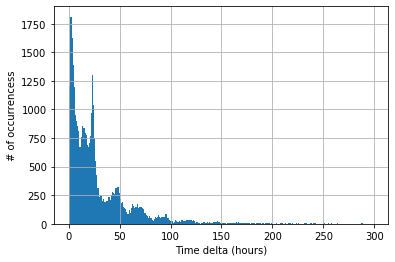

In [494]:
(times_between_moves / pd.Timedelta(hours=1)).hist(bins=range(0, 300,1))
plt.xlabel('Time delta (hours)')
plt.ylabel('# of occurrencess');

In [498]:
print('max time between bike was returned to one station and checked out at a different station: %f' % max(times_between_moves / pd.Timedelta(hours=1)))
print('min time between bike was returned to one station and checked out at a different station: %f' % min(times_between_moves / pd.Timedelta(hours=1)))

max time between bike was returned to one station and checked out at a different station: 608.479980
min time between bike was returned to one station and checked out at a different station: 0.008754


### Discussion

There appear to be some oddities in the bike movement which the user can in the preceding cells.  The 'weird_reposition_df' show 171 instances where the time difference between when we suspect a bike repositioning occurred under 15 minutes.  Some of these time deltas are concerningly small.  This may ultimately reflect an error in my implementation but I am curious to see if others in the class encountered this oddity as well.  


The two methods to detect the bike repositions is very inefficient and to run over the entire trip data file for each bike takes about 12-13 minutes on my machine.  While I have not implemented any alternative approaches here, it would be interesting to see if there is a significant gain in speedup using parallelization.  This is a pretty simplistic suggestion, but it makes sense intuitively that splitting the job of analyzing the data between multiple workers should result in a faster run time.  

--- 

### Create a Cesium movie for one bike

In [332]:
# Use this command to get documentation on the `createCesium()` function:
vrv.createCesium?

In [333]:
# startDate: Format is "YYYY-MM-DD"
startDate = pd.to_datetime(min(bike_trips_df['starttime'])).strftime('%Y-%m-%d')

# startTime: Format is "HH:MM:SS"
startTime = pd.to_datetime(min(bike_trips_df['starttime'])).strftime('%H:%M:%S')

vrv.createCesium(
    assignments = assignments[assignments['objectID'] == 14530],
    nodes       = nodes,
    startDate   = startDate,
    startTime   = startTime,
    cesiumDir   = os.environ['CESIUMDIR'],
    problemDir  = 'IE_670/citibike_example')

Message: File selector was written to /home/tim/development/cesium/IE_670/citibike_example/;IE_670;citibike_example.vrv ...
Message: Configs were written to /home/tim/development/cesium/IE_670/citibike_example/config.js ...
Message: Nodes were written to /home/tim/development/cesium/IE_670/citibike_example/displayNodes.js ...
Message: Assignments (.js) were written to /home/tim/development/cesium/IE_670/citibike_example/displayPaths.js ...
Message: Assignments (.czml) were written to /home/tim/development/cesium/IE_670/citibike_example/routes.czml ...


In [341]:
# FIXME

# The Cesium movie is cluttered with all of our station markers.
# It would be better to only include the markers that are actually relevant 
# to our given bike.

# Fortunately, our bike trips df contains the station IDs.
# We just need to get a list of unique IDs, and then 
# pass to createCesium only the subset of nodes corresponding to these IDs.



### Homework FIXME part 3

In [344]:
def filter_stations_based_on_bike(trip_df, bike_id):
    '''Filters trip_data_df for input bike_id. 
    '''
    new_trip_df = trip_df[trip_df['bikeid'] == bike_id]

    return new_trip_df
    
def get_unique_stations_from_trip(trip_df):
    '''Returns a list of unique start station ids, end station ids'''
    
    # get the start,end station column from dataframe 
    start_stations = trip_df['start station id']
    end_stations= trip_df['end station id']
    
    # convert to numpy array
    start_stations_arr = start_stations.to_numpy()
    end_stations_arr = end_stations.to_numpy()
    
    # combine the start and end stations into a single list
    new_arr = np.append(start_stations_arr, end_stations_arr, axis=0)

    # find the unique stations
    new_arr_unique = np.unique(new_arr)
    
    return new_arr_unique

def get_nodes_for_cesium_movie(unique_trip_station_ids, nodes):
    '''Returns a nodes data frame with stations ids that are contained in the unique trip stations list
       These nodes can then be used to make a much cleaner cesium movie. 
    '''   
    movie_nodes = nodes[nodes['id'].astype('int64').isin(unique_trip_station_ids)]
    
    return movie_nodes
    
    

In [345]:
# now let's try to make a move based on a single bike trip
trip_df = filter_stations_based_on_bike(bike_trips_df, 14530)
unique_ids = get_unique_stations_from_trip(trip_df)
nodes = get_nodes_for_cesium_movie(unique_ids, nodes)


# i just copied the previous cell that made a cesium movie here, but now the new movie will have the updated 
# values

# startDate: Format is "YYYY-MM-DD"
startDate = pd.to_datetime(min(bike_trips_df['starttime'])).strftime('%Y-%m-%d')

# startTime: Format is "HH:MM:SS"
startTime = pd.to_datetime(min(bike_trips_df['starttime'])).strftime('%H:%M:%S')

vrv.createCesium(
    assignments = assignments[assignments['objectID'] == 14530],
    nodes       = nodes,
    startDate   = startDate,
    startTime   = startTime,
    cesiumDir   = os.environ['CESIUMDIR'],
    problemDir  = 'IE_670/citibike_example')

Message: File selector was written to /home/tim/development/cesium/IE_670/citibike_example/;IE_670;citibike_example.vrv ...
Message: Configs were written to /home/tim/development/cesium/IE_670/citibike_example/config.js ...
Message: Nodes were written to /home/tim/development/cesium/IE_670/citibike_example/displayNodes.js ...
Message: Assignments (.js) were written to /home/tim/development/cesium/IE_670/citibike_example/displayPaths.js ...
Message: Assignments (.czml) were written to /home/tim/development/cesium/IE_670/citibike_example/routes.czml ...


--- 

#### Playing around with dates/times
- Here's some code related to formatting dates/times.  There might be something useful here in the future...

In [336]:
pd.to_datetime(bike_trips_df['starttime']).dt.date

0          2020-01-01
1          2020-01-01
2          2020-01-01
3          2020-01-01
4          2020-01-01
              ...    
1240591    2020-01-31
1240592    2020-01-31
1240593    2020-01-31
1240594    2020-01-31
1240595    2020-01-31
Name: starttime, Length: 1240596, dtype: object

In [337]:
pd.to_datetime(min(bike_trips_df['starttime'])).strftime('%Y-%m-%d')

'2020-01-01'

In [338]:
pd.to_datetime(min(bike_trips_df['starttime'])).strftime('%H:%M:%S')

'00:00:55'

--- 

### NYC Subway Stations

- A list of subway stations may be found here:
    - http://web.mta.info/developers/data/nyct/subway/Stations.csv 

- Other links:
    - http://web.mta.info/developers/index.html
    - http://datamine.mta.info/list-of-feeds 
    
Ideas:
- For a given location, find the nearest subway station.
- For a given destination, find the nearest **available** CitiBike station.
- For a given O/D pair, determine the best combination of subways/bikes to use.
